# Initialization
https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
train=pd.read_csv('../data/data.csv.zip', compression='zip', index_col=1)
train=train.drop(columns=['Unnamed: 0'])

In [3]:
train.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## Data cleaning

In [4]:
train.columns = train.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
train.columns.tolist()[:5]

['name', 'age', 'photo', 'nationality', 'flag']

In [5]:
train=train.drop(columns=['photo', 'flag', 'club_logo'])

In [6]:
train['value_unit'] = train['value'].str[-1]
train['nvalue'] = np.where(train['value_unit'] == '0', 0,
                          train['value'].str[1:-1].replace(r'[a-zA-Z]',''))
train['nvalue'] = train['nvalue'].astype(float)
train['nvalue'] = np.where(train['value_unit'] == 'M', train['nvalue'], train['nvalue'] / 1000)

train['wage_unit'] = train['wage'].str[-1]
train['nwage'] = np.where(train['wage_unit'] == '0', 0,
                          train['wage'].str[1:-1].replace(r'[a-zA-Z]',''))
train['nwage'] = train['nwage'].astype(float)
train['nwage'] = np.where(train['wage_unit'] == 'K', train['nwage'], train['nwage'] * 1000)

train.head()

,name,age,nationality,overall,potential,club,value,wage,special,preferred_foot,...,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause,value_unit,nvalue,wage_unit,nwage
ID,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,6.0,11.0,15.0,14.0,8.0,€226.5M,M,110.5,K,565.0
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,7.0,11.0,15.0,14.0,11.0,€127.1M,M,77.0,K,405.0
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,9.0,9.0,15.0,15.0,11.0,€228.1M,M,118.5,K,290.0
193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,90.0,85.0,87.0,88.0,94.0,€138.6M,M,72.0,K,260.0
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,15.0,13.0,5.0,10.0,13.0,€196.4M,M,102.0,K,355.0


In [59]:
import seaborn as sns
sns.set_palette("Greys_d")
import matplotlib.pyplot as plt


In [40]:
train.columns

Index(['name', 'age', 'nationality', 'overall', 'potential', 'club', 'value',
       'wage', 'special', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'position', 'jersey_number', 'joined', 'loaned_from',
       'contract_valid_until', 'height', 'weight', 'ls', 'st', 'rs', 'lw',
       'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
       'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb',
       'crossing', 'finishing', 'headingaccuracy', 'shortpassing', 'volleys',
       'dribbling', 'curve', 'fkaccuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprintspeed', 'agility', 'reactions', 'balance',
       'shotpower', 'jumping', 'stamina', 'strength', 'longshots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving',
       'gkhandling', 'gkkicking', 'gk

## Univariate plotting

Text(0.5, 1.0, 'Nationality')

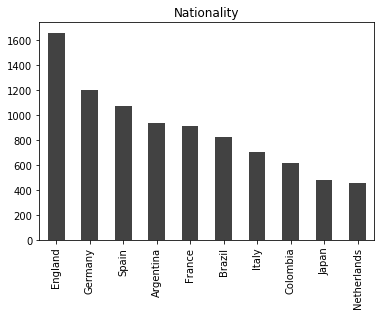

In [8]:
train.nationality.value_counts().head(10).plot.bar().set_title("Nationality")

Text(0.5, 1.0, 'Nationality')

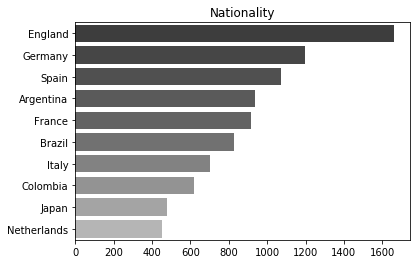

In [9]:
df=train.nationality.value_counts().head(10)
sns.barplot(y=df.index, x=df.values, palette="Greys_d").set_title("Nationality")

Text(0.5, 1.0, 'Age distribution')

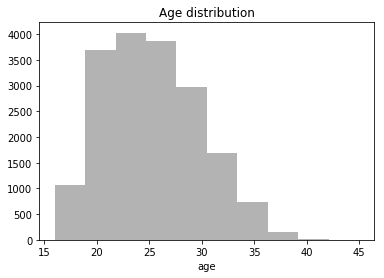

In [10]:
sns.distplot(train.age, bins=10, kde=False).set_title("Age distribution")

Text(0.5, 1.0, 'Wage distribution')

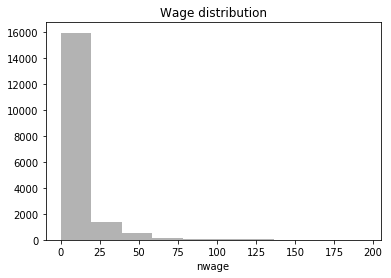

In [11]:
sns.distplot(train[train['nwage'] < 200]['nwage'], bins=10, kde=False).set_title("Wage distribution")

Text(0.5, 1.0, 'Overall points distribution')

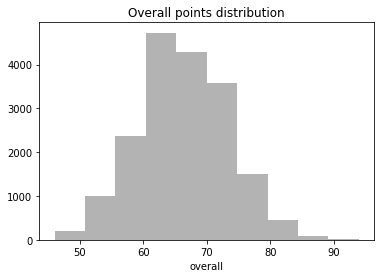

In [12]:
sns.distplot(train.overall, bins=10, kde=False).set_title("Overall points distribution")

<Figure size 936x576 with 0 Axes>

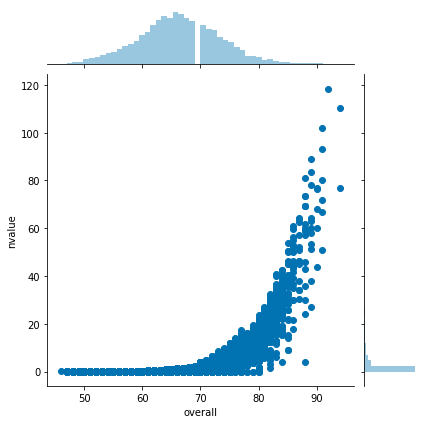

In [62]:
plt.figure(figsize=(13, 8))
sns.jointplot("overall", "nvalue", data=train)

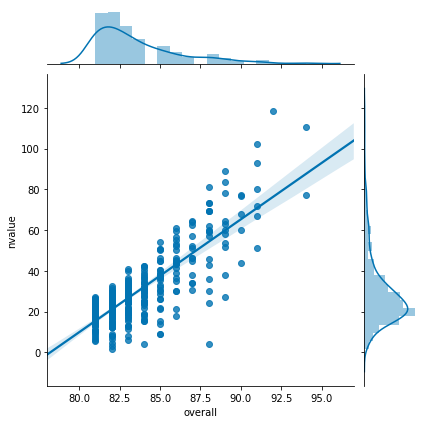

In [22]:
sns.jointplot("overall", "nvalue", data=train[train['overall'] > 80], kind="reg")

In [16]:
# train.groupby(['nationality'])['overall'].mean().sort_values().to_frame()
# df = train.groupby(['overall', 'nationality'])['nationality'].count().sort_values(ascending=False).to_frame().head(25)
# df.unstack()

### Count the number of times each of the possible overall score was received by the five most commonly scored countries.
5 most commonly scored countries.

In [17]:
nations=train.groupby(['nationality', ])['overall'].count().nlargest(5).index
nations

Index(['England', 'Germany', 'Spain', 'Argentina', 'France'], dtype='object', name='nationality')

Dataframe containing only those 5 counties.

In [18]:
df = train.loc[train['nationality'].isin(nations)]
df.head()
#df=train.isin({'nationality':nations})
#train[df]
#df2=train[df]
#df2.groupby(['overall', 'nationality'])['nationality'].count().sort_values(ascending=False).to_frame().head(25)
#df2.unstack()

,name,age,nationality,overall,potential,club,value,wage,special,preferred_foot,...,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause,value_unit,nvalue,wage_unit,nwage
ID,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,6.0,11.0,15.0,14.0,8.0,€226.5M,M,110.5,K,565.0
193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,90.0,85.0,87.0,88.0,94.0,€138.6M,M,72.0,K,260.0
155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,2201,Right,...,11.0,8.0,9.0,7.0,11.0,€104.6M,M,51.0,K,380.0
182521,T. Kroos,28,Germany,90,90,Real Madrid,€76.5M,€355K,2190,Right,...,10.0,11.0,13.0,7.0,10.0,€156.8M,M,76.5,K,355.0
168542,David Silva,32,Spain,90,90,Manchester City,€60M,€285K,2115,Left,...,6.0,15.0,7.0,6.0,12.0,€111M,M,60.0,K,285.0


Dataframe with indexes of overall score, nationality and count of the time each nationality has a give score.
Unstack the dataframe to pivot indexes into labels.

In [19]:
df2=df.groupby(['overall', 'nationality'])['nationality'].count().sort_values(ascending=False)
df2=df2.to_frame().unstack()
df2.head()

nationality                             
nationality   Argentina England France Germany Spain
overall                                             
46                  NaN     1.0    NaN     NaN   NaN
47                  NaN     7.0    NaN     2.0   NaN
48                  NaN    11.0    NaN     NaN   NaN
49                  NaN    12.0    NaN     2.0   NaN
50                  NaN    14.0    1.0     2.0   NaN

Text(0.5, 1.0, 'Count of overall score for each nation')

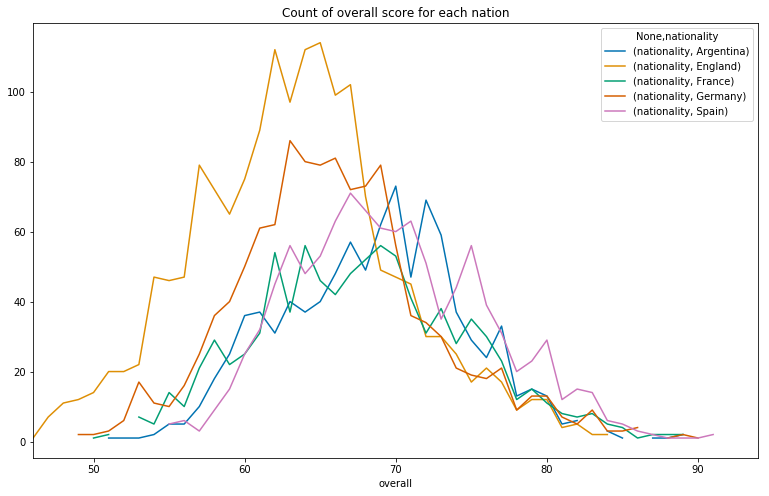

In [20]:
sns.set_palette("colorblind")
df2.plot.line(figsize=(13,8)).set_title("Count of overall score for each nation")

Text(0.5, 1.0, 'Point distribution of 5 most heavily respresented nations')

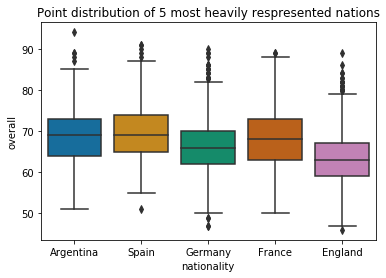

In [30]:
# train[train.nationality.isin(train.nationality.value_counts().head(5).index)]

sns.boxplot(
    x='nationality',
    y='overall',
    data=train[train.nationality.isin(train.nationality.value_counts().head(5).index)]
).set_title("Point distribution of 5 most heavily respresented nations")

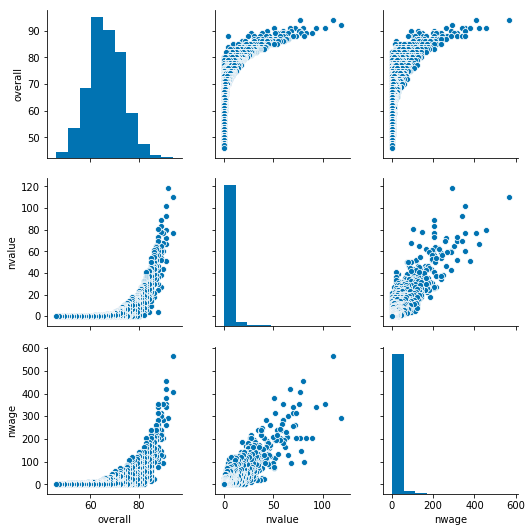

In [36]:
sns.pairplot(train[['overall', 'nvalue', 'nwage']])


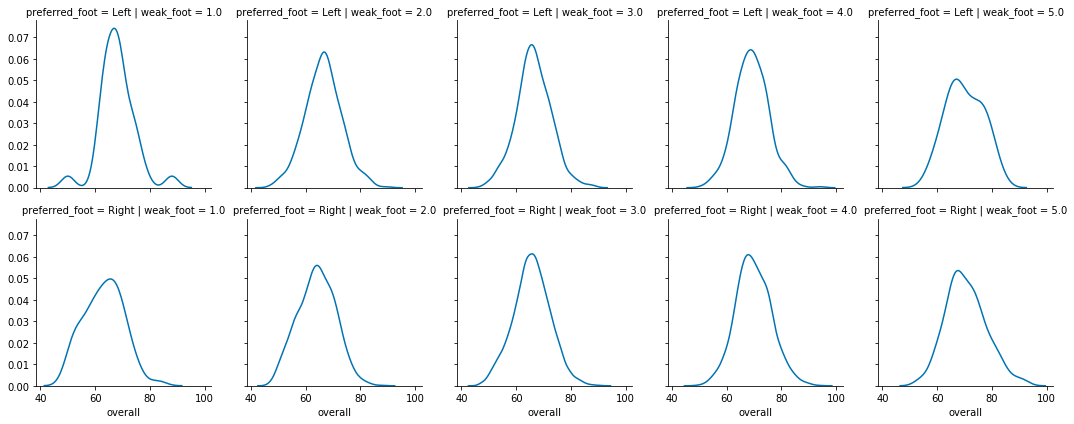

In [45]:
g=sns.FacetGrid(train
                , col="weak_foot"
                , row="preferred_foot")
g.map(sns.kdeplot, "overall")


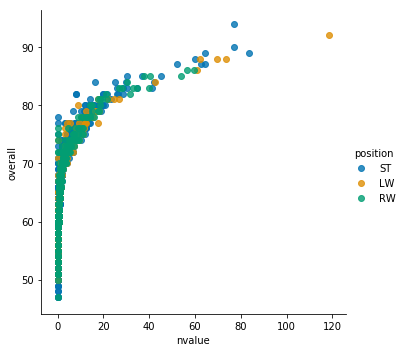

In [47]:
sns.lmplot(x='nvalue', y='overall', hue='position', 
           data=train.loc[train['position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False)

Text(0.5, 1.0, 'Strikers are more aggressive than goalkeepers')

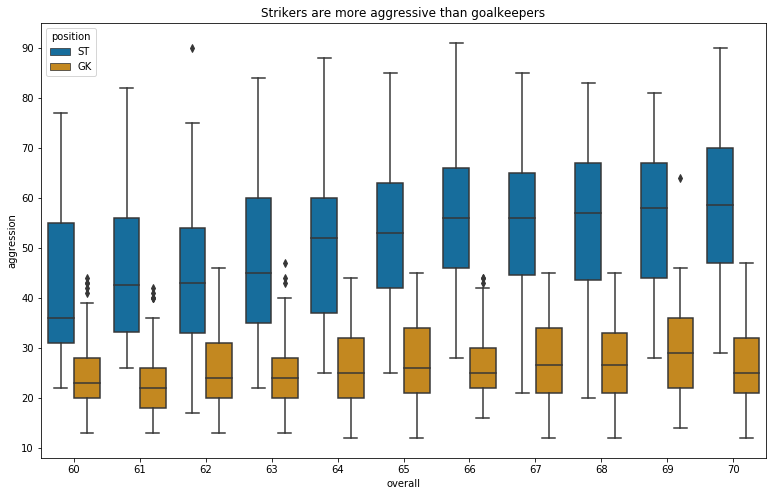

In [61]:
f = (train
         .loc[train['position'].isin(['ST', 'GK', ])]
         .loc[:, ['nvalue', 'overall', 'aggression', 'position']]
    )
f = f[f["overall"] >= f.overall.quantile(.25)]
f = f[f["overall"] < f.overall.quantile(.75)]
f['aggression'] = f['aggression'].astype(float)

plt.figure(figsize=(13, 8))
sns.set_palette("colorblind")
sns.boxplot(x="overall"
            , y="aggression"
            , hue='position'
            , data=f).set_title("Strikers are more aggressive than goalkeepers")